# 1. Authenticate to Twitter

In [98]:
!pip install tweepy

In [99]:
import numpy as np
import pandas as pd
import tweepy as tw
from matplotlib import pyplot as plt

In [100]:
consumer_key = '5g60WUZMcjMMlMLSbnXh4e2JK'
consumer_secret = 'EdVktHnAx5L96JLXWZ4x3GO5xE23YPvd0UlEyTaqgGvCEdu1a6'
access_token = '1139038582276968448-nCHaKqE18OAkGZtqN42us6MU0iz4es'
access_token_secret = 'P5mtmxEadWYAYF41fMAEab95yQUw8fCJ4GdniIylsdU07'

In [101]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [102]:
import pandas as pd
df_tweets = pd.read_csv("/kaggle/input/tweets-avengersendgame-data/tweets.csv")
df_tweets = df_tweets.rename(columns={'text': 'tweets','created': 'timestamp'})
tweets = [{'tweets':tweet[0], 'timestamp':tweet[1]} for tweet in df_tweets.values]

In [ ]:
hashtag = "#AvengersEndgame"
#query = tw.Cursor(api.search_tweets, q=hashtag).items(15000)
#tweets = [{'tweets':tweet.text, 'timestamp':tweet.created_at} for tweet in query]
print(tweets)

In [104]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,tweets,timestamp
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...,2019-04-23 10:43:30
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201...",2019-04-23 10:43:30
2,saving these bingo cards for tomorrow \n©\n #A...,2019-04-23 10:43:30
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:29
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",2019-04-23 10:43:29


In [105]:
cast_member_variations = {
    "Iron Man": ["Iron Man", "Ironman", "Tony Stark", "Robert Downey Jr.", "Robert", "Downey", "Jr"],
    "Captain America": ["Captain America", "CaptainAmerica", "Cap", "Steve Rogers", "Chris Evans", "Chris", "Evans"],
    "Thor": ["Thor", "Chris Hemsworth", "Chris", "Hemsworth"],
    "Black Widow": ["Black Widow", "Blackwidow", "Natasha Romanoff", "Scarlett Johansson", "Scarlett", "Johansson"],
    "Hulk": ["Hulk", "Bruce Banner", "Mark Ruffalo", "Mark", "Ruffalo"],
    "Hawkeye": ["Hawkeye", "Clint Barton", "Jeremy Renner", "Jeremy", "Renner"],
    "Black Panther": ["Black Panther", "Blackpanther", "T'Challa", "Chadwick Boseman", "Chadwick", "Boseman"],
    "Captain Marvel": ["Captain Marvel", "Captainmarvel", "Carol Danvers", "Brie Larson", "Brie", "Larson"],
    "Thanos": ["Thanos", "The Mad Titan", "Josh Brolin", "Josh", "Brolin"]
}


# 3. Preprocess

In [106]:
# Import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Import textblob
from textblob import Word, TextBlob
lemmatizer = WordNetLemmatizer()

In [107]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#AvengersEndgame']

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
import re  # Import the re module for regular expressions
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet = re.sub(r"http\S+", "", processed_tweet)  # Use re.sub for replacements
    processed_tweet = re.sub(r"@(\w+)", "\\1", processed_tweet)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = re.sub(r"[^\w\s]","", processed_tweet)
    processed_tweet = re.sub(r"#(\w+)", r"\1", processed_tweet)
    #processed_tweet = " ".join(lemmatizer.lemmatize(word) for word in processed_tweet.split())
    processed_tweet = processed_tweet.lower()
    return(processed_tweet)

df['Processed Tweet'] = df['tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()
df['Processed Tweet'][:10]

0                        mrvelstan literally nobody me
1    agntecarter im emotional sorry 2014 x 2019 bla...
2                         saving bingo cards tomorrow 
3                         helloboon man ads everywhere
4       marvel we salute you chrisevans captainamerica
5    mcu_direct the first nonspoiler critic reactio...
6    renner4real ready rock  excited avengersendgam...
7             avengers were til end line wintersoldier
8    variety first reactions most emotional epic mc...
9                         helloboon man ads everywhere
Name: Processed Tweet, dtype: object

In [109]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref.lower()) != -1:
            flag = 1
    return flag

df['Iron Man'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Iron Man'])) 
df['Captain America'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Captain America']))
df['Thor'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Thor'])) 
df['Black Widow'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Black Widow'])) 
df['Hulk'] = df['tweets'].apply(lambda x: identify_subject(x, cast_member_variations['Hulk'])) 
df['Hawkeye'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Hawkeye'])) 
df['Black Panther'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Black Panther'])) 
df['Captain Marvel'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Captain Marvel'])) 
df['Thanos'] = df['Processed Tweet'].apply(lambda x: identify_subject(x, cast_member_variations['Thanos'])) 
df.head(10)

,tweets,timestamp,Processed Tweet,Iron Man,Captain America,Thor,Black Widow,Hulk,Hawkeye,Black Panther,Captain Marvel,Thanos
0,RT @mrvelstan: literally nobody:\nme:\n\n#Aven...,2019-04-23 10:43:30,mrvelstan literally nobody me,0,0,0,0,0,0,0,0,0
1,"RT @agntecarter: i’m emotional, sorry!!\n\n201...",2019-04-23 10:43:30,agntecarter im emotional sorry 2014 x 2019 bla...,0,1,0,1,0,0,0,0,0
2,saving these bingo cards for tomorrow \n©\n #A...,2019-04-23 10:43:30,saving bingo cards tomorrow,0,0,0,0,0,0,0,0,0
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:29,helloboon man ads everywhere,0,0,0,0,0,0,0,0,0
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",2019-04-23 10:43:29,marvel we salute you chrisevans captainamerica,0,1,1,0,0,0,0,0,0
5,RT @MCU_Direct: The first NON-SPOILER #Avenger...,2019-04-23 10:43:29,mcu_direct the first nonspoiler critic reactio...,0,0,0,0,0,0,0,0,0
6,RT @Renner4Real: Ready to rock ! #excited #...,2019-04-23 10:43:28,renner4real ready rock excited avengersendgam...,0,0,0,0,0,1,0,0,0
7,RT @Avengers: We’re with him ‘til the end of t...,2019-04-23 10:43:28,avengers were til end line wintersoldier,0,0,0,0,0,0,0,0,0
8,RT @Variety: #AvengersEndgame first reactions:...,2019-04-23 10:43:27,variety first reactions most emotional epic mc...,0,0,0,0,0,0,0,0,0
9,RT @HelloBoon: Man these #AvengersEndgame ads ...,2019-04-23 10:43:26,helloboon man ads everywhere,0,0,0,0,0,0,0,0,0


In [110]:
print('Base review\n', df['tweets'][4])
print('\n------------------------------------\n')
print('Cleaned review\n', df['Processed Tweet'][4])

Base review
 RT @Marvel: We salute you, @ChrisEvans! #CaptainAmerica #AvengersEndgame https://t.co/VlPEpnXYgm

------------------------------------

Cleaned review
 marvel we salute you chrisevans captainamerica


# 4. Calculate Sentiment

In [111]:
df.columns
import numpy as np

In [112]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'polarity', 'subjectivity']].tail(10)

,Processed Tweet,polarity,subjectivity
14990,itsjustanx elizabeth olsen looks absolutely st...,0.500,1.00
14991,nikkietutorials reason number 7241 stan brie l...,0.000,0.00
14992,marvel elizabeth olsen bringing magicu2728 sca...,0.000,0.00
14993,cobiesmulders ooooooh guys its good,0.700,0.60
14994,marvel_ffightus we take fight back him win mar...,0.400,0.20
14995,natsdany first time last time avengers avenger...,0.125,0.20
14996,mtvnews the cast seen lot years figured could ...,-0.400,0.40
14997,spicinemas kindly announce approximate timings...,0.100,0.75
14998,marvel we salute you chrisevans captainamerica,0.000,0.00
14999,avengers welcome party robertdowneyjr ironman,0.800,0.90


In [113]:
def analyze_cast_sentiment(df, cast_member):
    #"""Analyzes sentiment for a specific cast member."""
    cast_tweets = df[df[cast_member]==1]
    sentiment_data = cast_tweets[['polarity', 'subjectivity']].describe()  # Descriptive statistics
    return sentiment_data

cast_members = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk', 'Hawkeye', 'Black Panther', 'Captain Marvel', 'Thanos']
cast_sentiment_data = {}
for cast_member in cast_members:
      cast_sentiment_data[cast_member] = analyze_cast_sentiment(df.copy(), cast_member)
print(cast_sentiment_data)

{'Iron Man':           polarity  subjectivity
count  1200.000000   1200.000000
mean      0.567740      0.494690
std       0.363498      0.350109
min      -0.400000      0.000000
25%       0.000000      0.362500
50%       0.800000      0.400000
75%       0.800000      0.900000
max       1.000000      1.000000, 'Captain America':           polarity  subjectivity
count  3050.000000   3050.000000
mean      0.095834      0.183498
std       0.212981      0.329482
min      -0.700000      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      0.200000
max       1.000000      1.000000, 'Thor':           polarity  subjectivity
count  2201.000000   2201.000000
mean      0.109732      0.200231
std       0.218641      0.354210
min      -0.312500      0.000000
25%       0.000000      0.000000
50%       0.000000      0.000000
75%       0.000000      0.300000
max       1.000000      1.000000, 'Black Widow':           polarity  subjectivity
count  1102.000000

# 5. Visualise

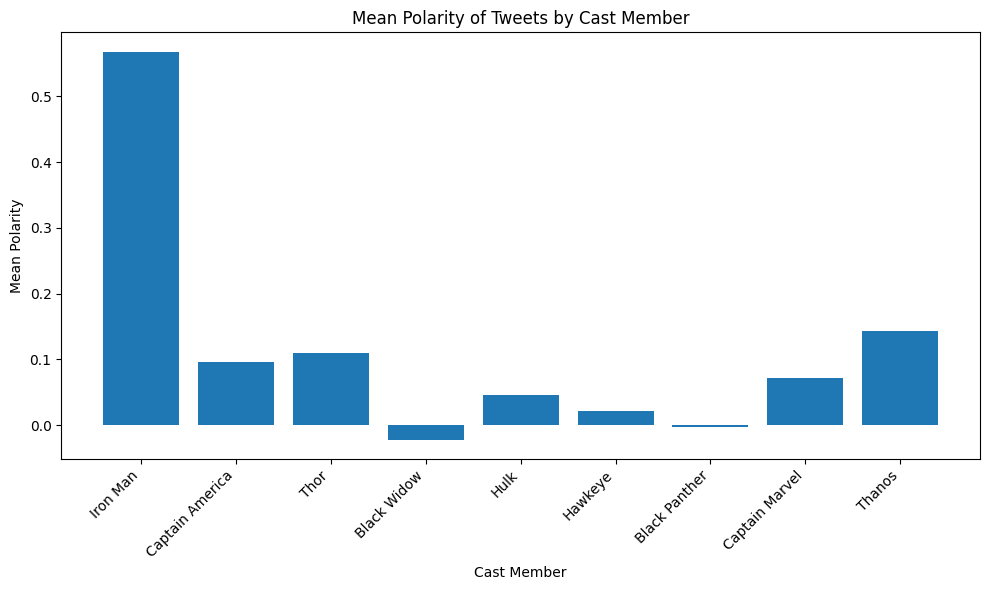

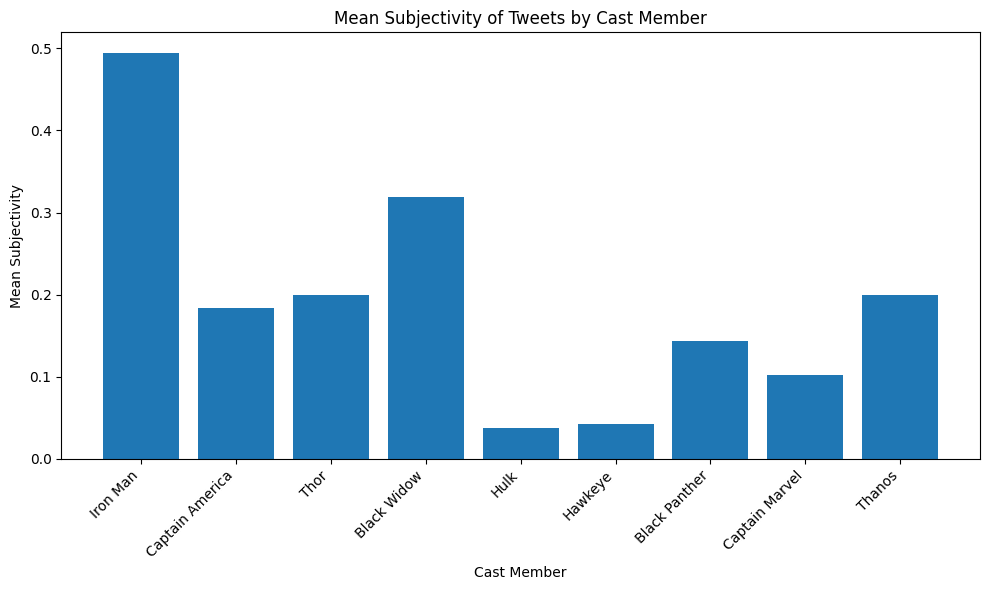

In [114]:
import matplotlib.pyplot as plt

# Extract specific statistic (e.g., mean polarity) for each cast member
mean_polarity = {cast_member: cast_sentiment_data[cast_member]['polarity']['mean'] for cast_member in cast_members}
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_polarity.keys(), mean_polarity.values())
plt.xlabel('Cast Member')
plt.ylabel('Mean Polarity')
plt.title('Mean Polarity of Tweets by Cast Member')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Extract specific statistic (e.g., mean polarity) for each cast member
mean_subjectivity = {cast_member: cast_sentiment_data[cast_member]['subjectivity']['mean'] for cast_member in cast_members}
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_subjectivity.keys(), mean_subjectivity.values())
plt.xlabel('Cast Member')
plt.ylabel('Mean Subjectivity')
plt.title('Mean Subjectivity of Tweets by Cast Member')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


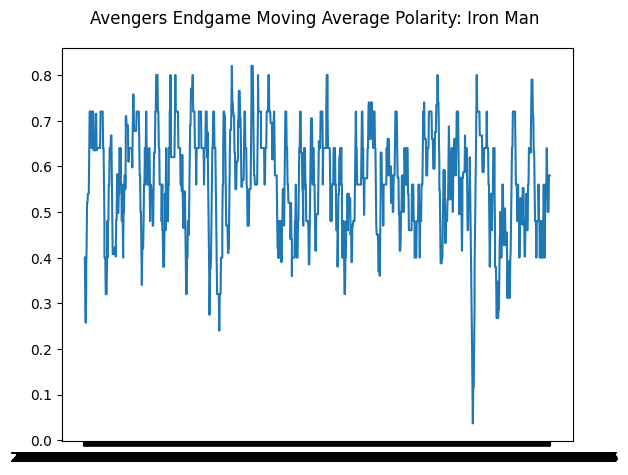

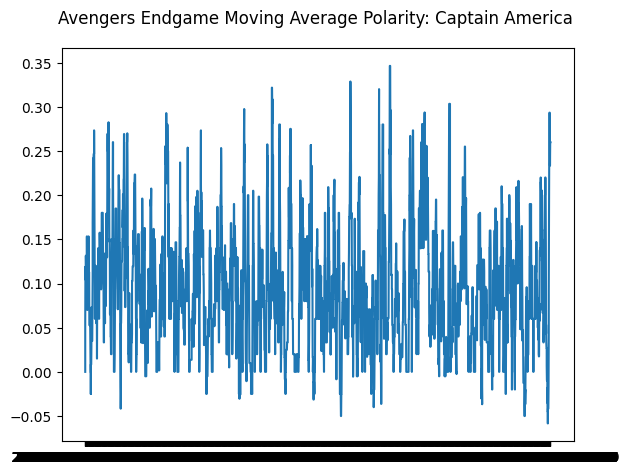

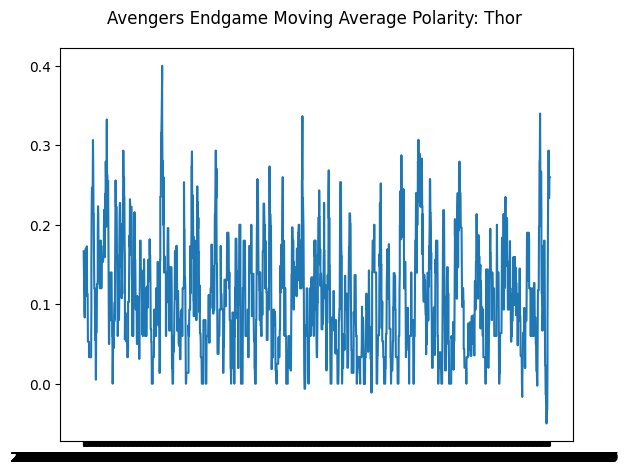

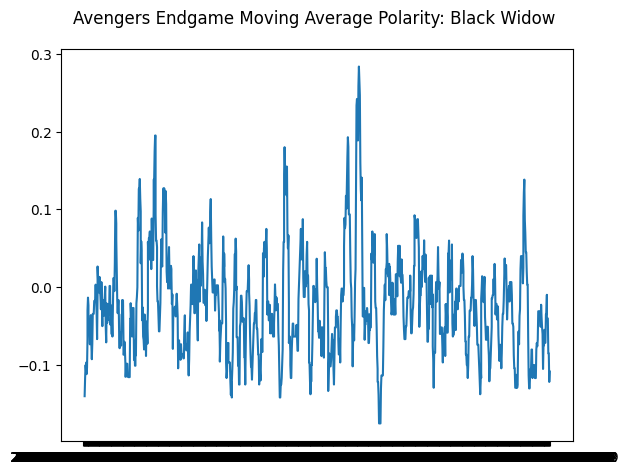

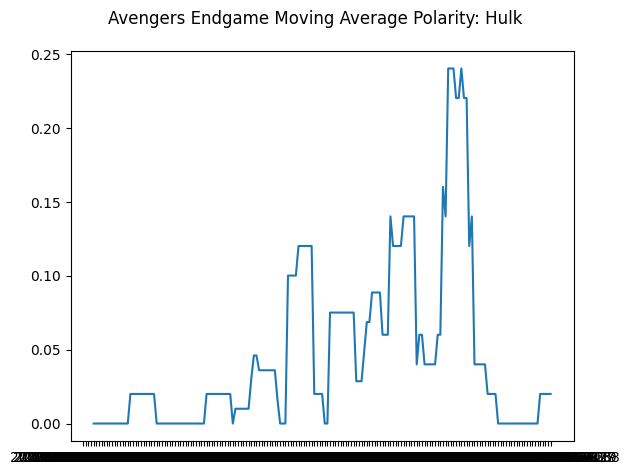

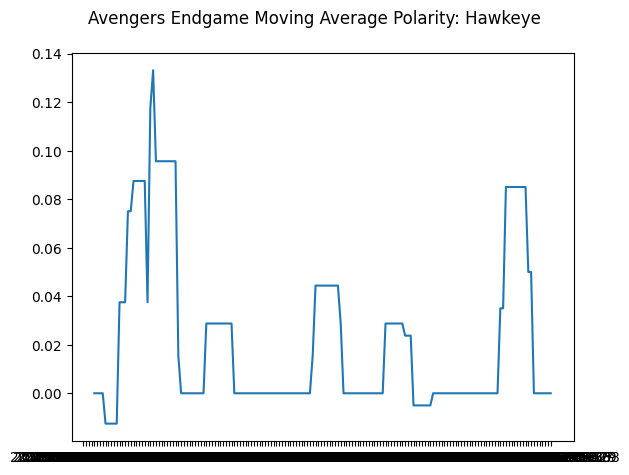

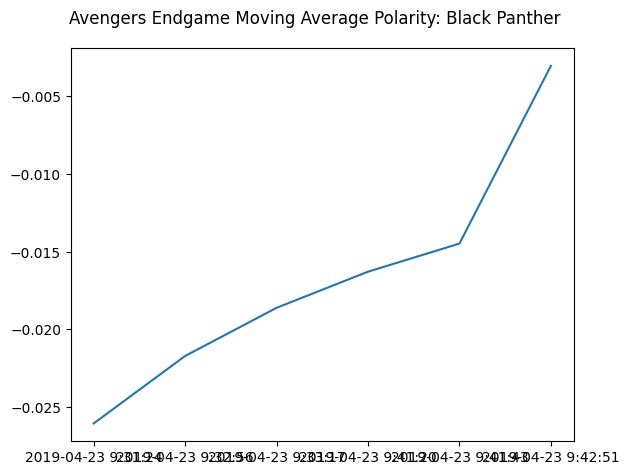

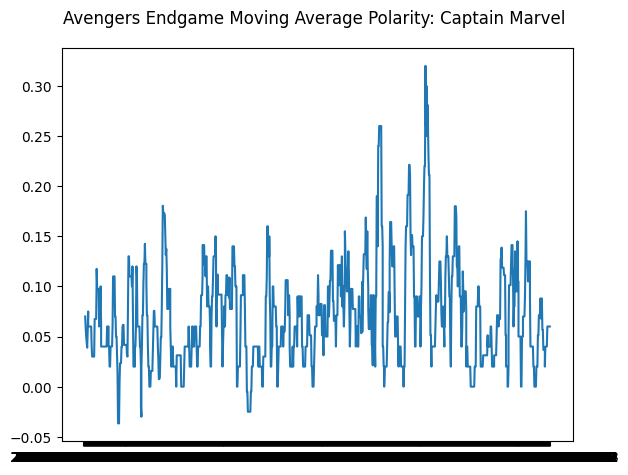

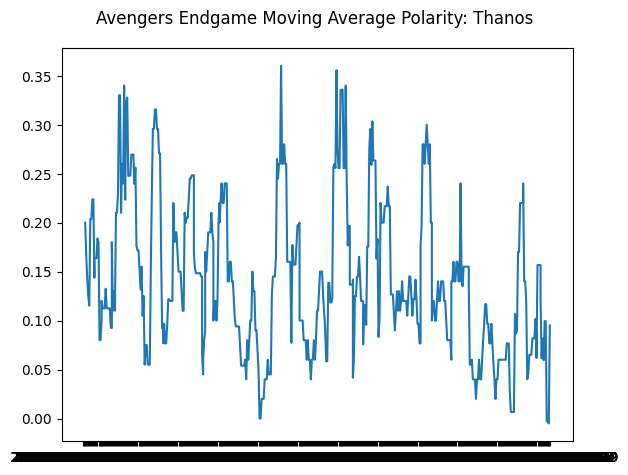

In [115]:
import matplotlib.pyplot as plt

# Assuming data is a dictionary where keys are member names and values are DataFrames
# List of member names
members = cast_sentiment_data.keys()
# Plot for each member
for i, member in enumerate(members):
    # Access DataFrame for the member from data dictionary
    cast_member = member  # Replace with the desired cast member

    df_filtered = df[df[cast_member] == 1]  # Filter for tweets mentioning 'Iron Man'
    df_MA_Polarity = df_filtered[['timestamp', 'polarity']]
    df_MA_Polarity = df_MA_Polarity.sort_values(by='timestamp', ascending=True)
    df_MA_Polarity['MA Polarity'] = df_MA_Polarity['polarity'].rolling(10, min_periods=5).mean()

    # Plot the moving average polarity for cast
    plt.plot(df_MA_Polarity['timestamp'], df_MA_Polarity['MA Polarity'])
    plt.suptitle("\n".join(["Avengers Endgame Moving Average Polarity: " + member ]))
    # Adjust layout
    plt.tight_layout()
    plt.show()

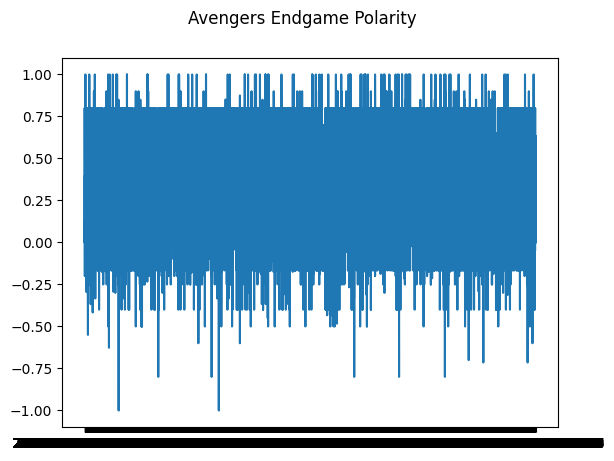

In [116]:
df_MA_Polarity_All = df[['timestamp','polarity']]
df_MA_Polarity_All = df_MA_Polarity_All.sort_values(by='timestamp', ascending=True)
df_MA_Polarity_All['MA Polarity'] = df_MA_Polarity_All.polarity.rolling(20, min_periods=5).mean()

# Plot the moving average polarity for Iron Man
plt.plot(df_MA_Polarity_All['timestamp'], df_MA_Polarity_All['polarity'])
plt.suptitle("\n".join(["Avengers Endgame Polarity"]))

plt.show()


In [117]:
from wordcloud import WordCloud
from collections import Counter

In [120]:
       
def generate_wordcloud(character, tweets, sentiment_dict=None):
    # Combine all tweets for a single word count
    all_words = ' '.join(tweets)

    # Create a word count dictionary
    word_counts = Counter(all_words.split())

    #Optionally filter out low-frequency words
    threshold = 0.5
    word_counts = {word: count for word, count in word_counts.items() if count > threshold}

    # Generate the word cloud
    wordcloud = WordCloud(background_color="white", max_words=200, collocations=False, width=800, height=600, color_func=None).generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"{character}'s Word Cloud")
    plt.show()


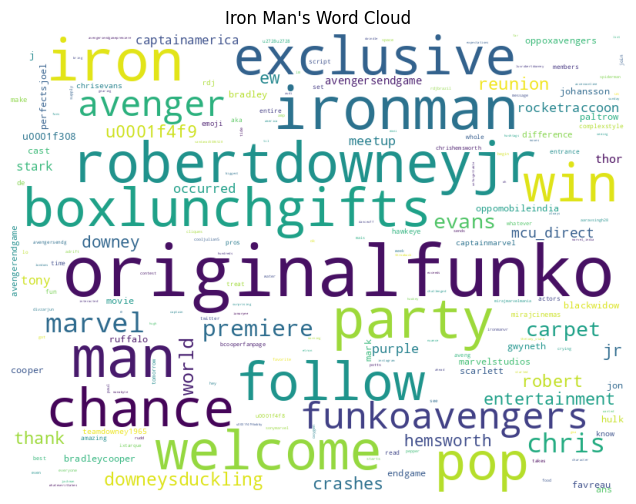

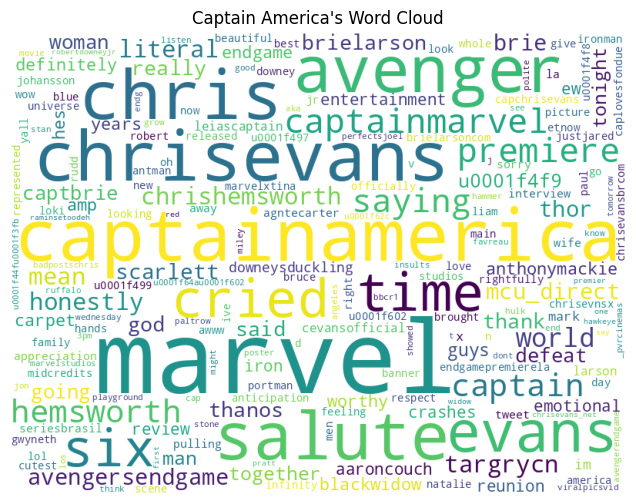

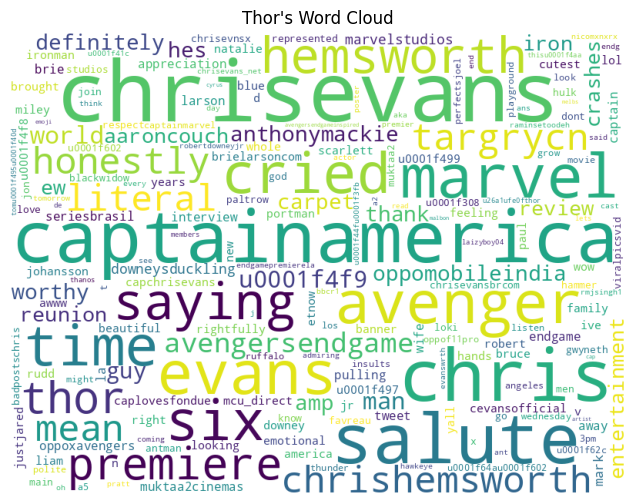

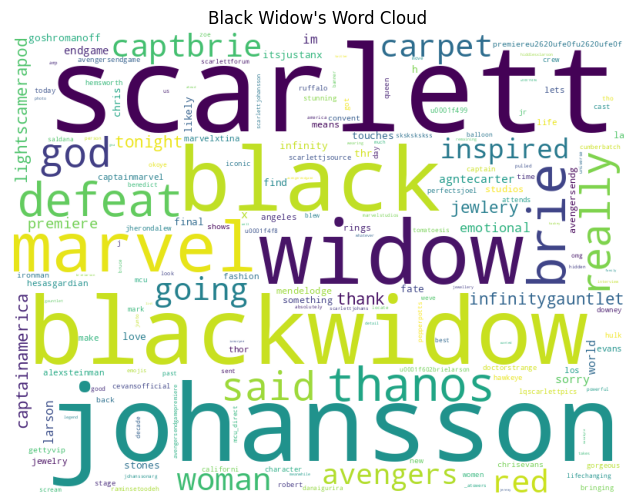

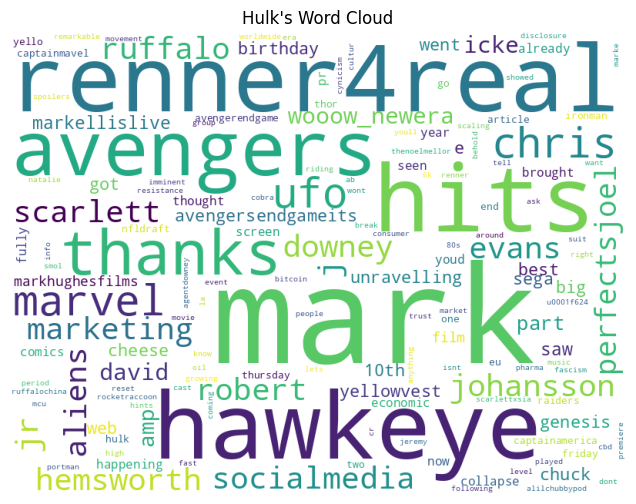

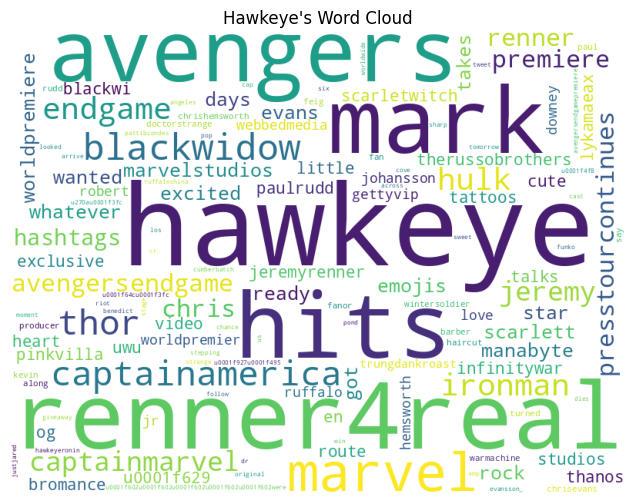

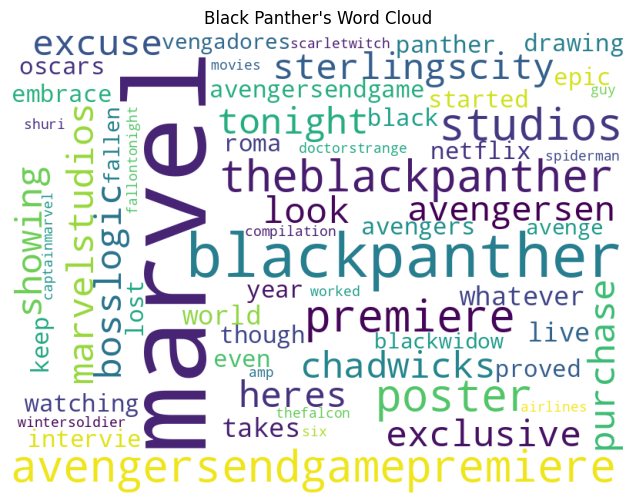

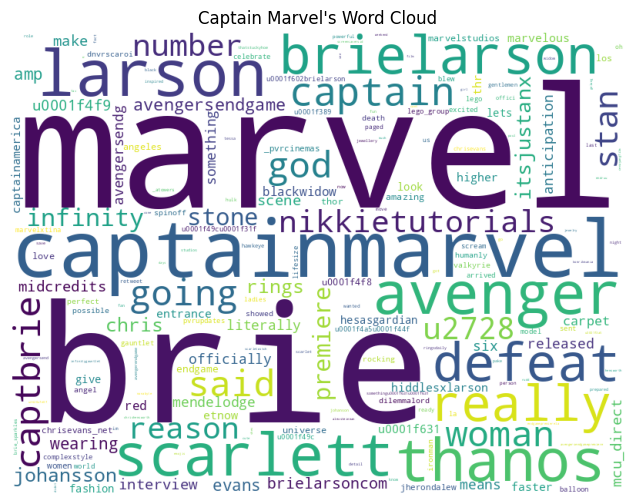

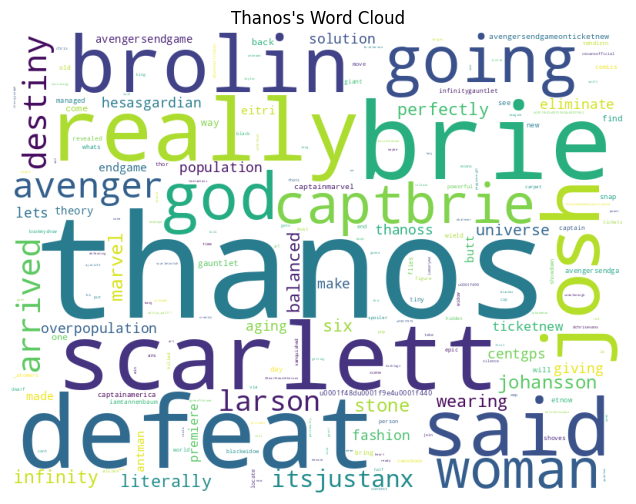

In [121]:
for character in members:
      tweets = df[df[character] == 1]['Processed Tweet']
      generate_wordcloud(character, tweets)
